In [29]:
import pandas as pd
from sklearn import * 
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [5]:
target = "default"
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [11]:
target = "default"
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])
X = df.drop(columns=target)

X_dummy = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy.values * 1.0, y
                                        , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(random_state = 241, solver = "liblinear"))
])

pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [12]:
pd.DataFrame(dict(actual = y_test, prediction = y_test_pred))

,actual,prediction
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [21]:
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_test_pred))
print("Test accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Training accuracy:", metrics.accuracy_score(y_train, y_train_pred))

Confusion matrix:
 [[188  26]
 [ 47  39]]
Test accuracy: 0.7566666666666667
Training accuracy: 0.7957142857142857


Test accuracy: 0.7566666666666667
Training accuracy: 0.7957142857142857


In [26]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.8, 1, 0)

print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_test_pred))
print("Test accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("Test recall:", metrics.recall_score(y_test, y_test_pred))
print("Training recall:", metrics.recall_score(y_train, y_train_pred))
print("Test precision:", metrics.precision_score(y_test, y_test_pred))
print("Training precision:", metrics.precision_score(y_train, y_train_pred))



Confusion matrix:
 [[209   5]
 [ 71  15]]
Test accuracy: 0.7466666666666667
Training accuracy: 0.7957142857142857
Test recall: 0.1744186046511628
Training recall: 0.5887850467289719
Test precision: 0.75
Training precision: 0.6961325966850829


Text(0, 0.5, 'TPR')

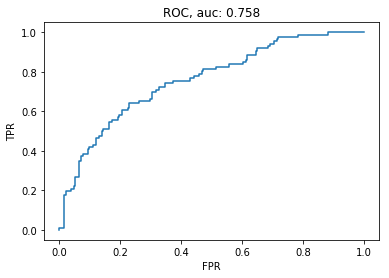

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.title("ROC, auc: %.3f" % auc)
plt.xlabel("FPR")
plt.ylabel("TPR")